# Wine Quality Clasification Notebook

## Dataset Description
This dataset consists of 1,000 wine samples, where each sample has been assessed using four chemical features and assigned a quality label (low, medium, or high). The dataset is intended for classification tasks—the objective is to build a model that can predict the quality_label of a wine based on its chemical attributes.

Wines can have their quality influenced by various physicochemical factors (e.g., sugar content, acidity, alcohol). Understanding these can help producers and researchers assess wine characteristics and potentially improve production quality.

## Data Collection
The dataset is hosted on Kaggle by user sahideseker and described simply as containing 1,000 labeled wine samples with key attributes. 
[Wine Quality Classification](https://www.kaggle.com/datasets/sahideseker/wine-quality-classification?fbclid=IwY2xjawKri85leHRuA2FlbQIxMABicmlkETFwSmpnYkdhVDFlTnB5Nm9lAR5XrBjEEytHpU0oDCEo4Fs1W97qrXJQrLufftsi_Ro4KXY7ZrGxk17P3rU7Ug_aem_HhBigX5iAqh3X31BoKJfeA)

However, the dataset page does not clearly describe the data collection methodology. There is no information about how the wines were selected, whether the samples include red or white varieties, how the quality labels were assigned, or what the original source of the data is.

### Potential Implications of Data Collection
* Label Origin Ambiguity: If labels derive from expert scores versus rule-based thresholds, this can affect model interpretability and reliability.
* Sampling Bias: Without clear provenance, it's unclear whether all wine types or regions are equally represented.
* Limited Feature Scope: Only four chemical attributes are included, so models trained on this may miss nuance present in broader feature sets.



## Structure of the Data
This is a structured, tabular dataset with:
* Rows: Each row corresponds to one wine sample.
* Columns: Each column is either a measurable physicochemical feature or the class label.
* Total Observations: 1000 rows (wine samples)
* Total Features: 5 columns (4 features + 1 label)

## Column-by-Column Breakdown
| Column Name      | Data Type            | Description                                                                                                                     |
| ---------------- | -------------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| `fixed_acidity`  | Float                | Refers to acids that do not evaporate readily. Affects flavor and stability. Higher values often mean higher tartness.          |
| `residual_sugar` | Float                | The amount of sugar left after fermentation. Impacts sweetness.                                                                 |
| `alcohol`        | Float                | Alcohol percentage by volume. Higher alcohol often contributes to a better quality perception.                                  |
| `density`        | Float                | Density of the wine, related to sugar and alcohol content. Important for quality and fermentation monitoring.                   |
| `quality_label`  | Object (Categorical) | The assigned quality class for each wine: `low`, `medium`, or `high`. This is the **target variable** for classification tasks. |





## Data Cleaning

#### Load the data

In [22]:
import pandas as pd

df = pd.read_csv('wine_quality_classification.csv')
df.head()

,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,9.3,6.4,13.6,1.0005,high
1,11.2,2.0,14.0,0.9912,medium
2,11.6,0.9,8.2,0.9935,low
3,12.9,6.6,12.7,1.0002,low
4,13.9,13.8,10.4,0.9942,medium


#### Check for Incorrect Data Types

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fixed_acidity   1000 non-null   float64
 1   residual_sugar  1000 non-null   float64
 2   alcohol         1000 non-null   float64
 3   density         1000 non-null   float64
 4   quality_label   1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


#### Check for Missing Data

In [24]:
df.isnull().sum()

fixed_acidity     0
residual_sugar    0
alcohol           0
density           0
quality_label     0
dtype: int64

#### Check Duplicate Data

In [25]:
df.duplicated().sum()

np.int64(0)

#### Check for Inconsistent Formatting

In [26]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['fixed_acidity', 'residual_sugar', 'alcohol', 'density', 'quality_label']


#### Check for Outliers

In [27]:
for col in ['fixed_acidity', 'residual_sugar', 'alcohol', 'density']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")


fixed_acidity: 0 outliers
residual_sugar: 0 outliers
alcohol: 0 outliers
density: 0 outliers


## Data Cleaning Summary

After thorough inspection, no errors, inconsistencies, or missing values were found in the dataset.
All columns have appropriate data types, categorical labels are consistently formatted, and no duplicate or null values exist.
The dataset is clean and does not require additional preprocessing.

## Exploratory Data Analysis (EDA)

In this section, we will perform Exploratory Data Analysis (EDA) to better understand the distribution of features, relationships between variables, and patterns associated with wine quality labels. Visualizations and summary statistics will help uncover trends and inform subsequent modeling steps.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns     

## Research Question

**Main Research Question:** "What combination of chemical properties best predicts wine quality classification, and how do these properties interact with each other?"

To explore this main question, we'll investigate the following exploratory data analysis questions:

1. How do the distributions of chemical properties differ across wine quality categories?
2. What relationships exist between the chemical properties of wine, and do these relationships change based on quality level?
3. Are there distinct clusters or patterns in the chemical composition that correspond to quality classifications?

In [29]:
print("Basic statistics of the dataset:")
print(df.describe())

# Distribution of wine quality labels
print("\nDistribution of wine quality labels:")
quality_counts = df['quality_label'].value_counts()
print(quality_counts)

Basic statistics of the dataset:
       fixed_acidity  residual_sugar      alcohol      density
count    1000.000000      1000.00000  1000.000000  1000.000000
mean       10.174300         7.69200    11.039900     0.997505
std         3.452693         4.20892     1.760283     0.004300
min         4.000000         0.50000     8.000000     0.990000
25%         7.100000         4.10000     9.500000     0.993900
50%        10.400000         7.55000    11.000000     0.997400
75%        13.125000        11.50000    12.600000     1.001200
max        16.000000        15.00000    14.000000     1.005000

Distribution of wine quality labels:
quality_label
medium    355
high      343
low       302
Name: count, dtype: int64


## Exploratory Data Analysis

### Distribution of Chemical Properties by Wine Quality
#### 1. How do the distributions of chemical properties differ across wine quality categories?


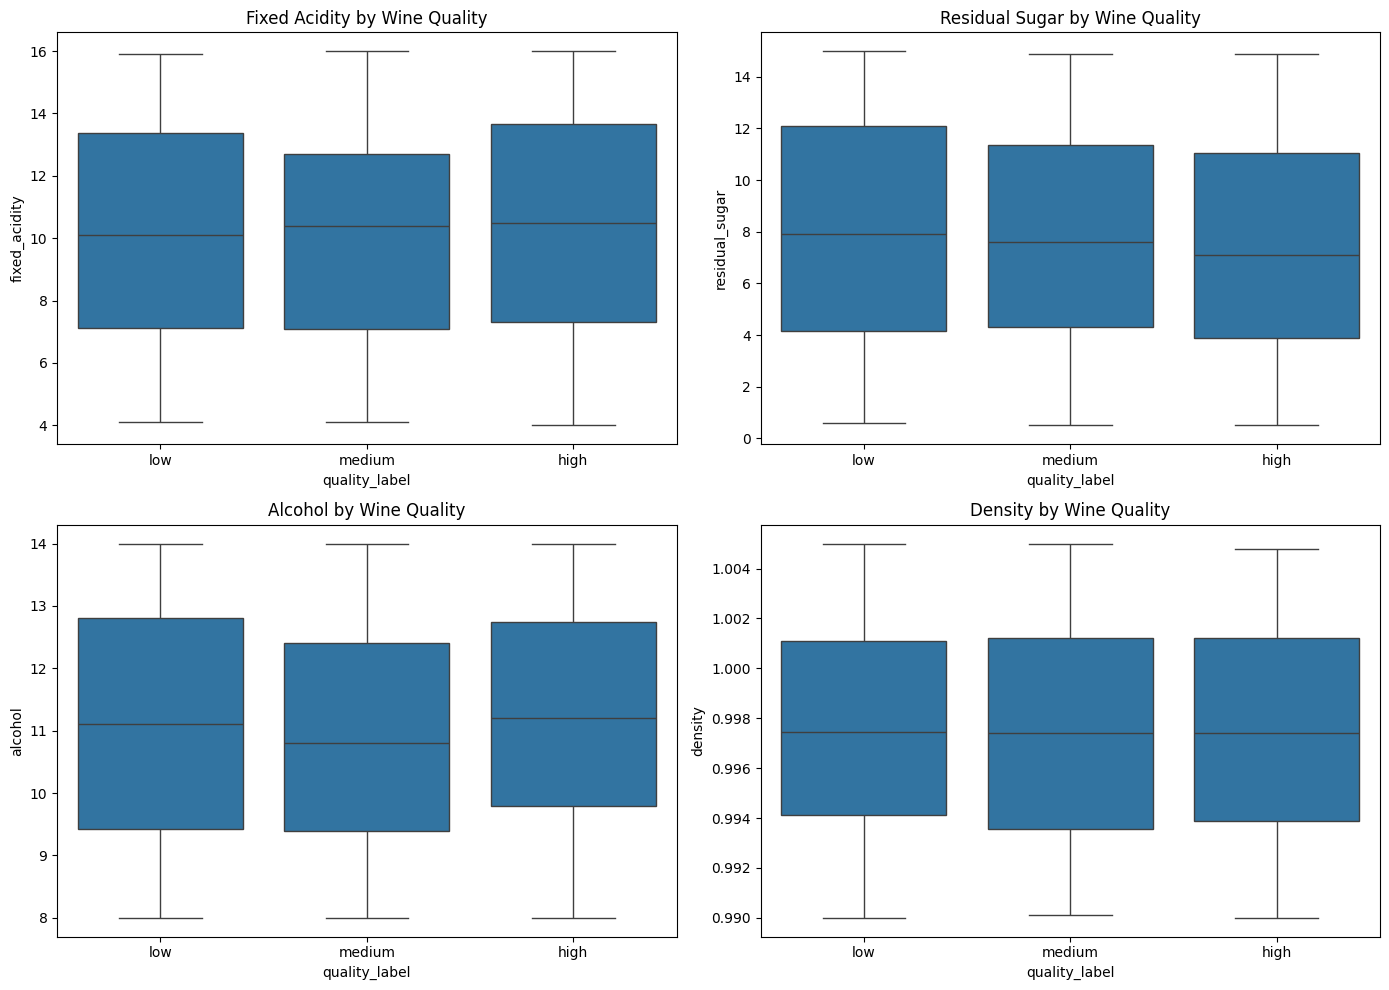

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define the order for quality labels
quality_order = ['low', 'medium', 'high']

# Plot 1 - Fixed Acidity
sns.boxplot(data=df, x='quality_label', y='fixed_acidity', ax=axes[0, 0], order=quality_order)
axes[0, 0].set_title('Fixed Acidity by Wine Quality')

# Plot 2 - Residual Sugar
sns.boxplot(data=df, x='quality_label', y='residual_sugar', ax=axes[0, 1], order=quality_order)
axes[0, 1].set_title('Residual Sugar by Wine Quality')

# Plot 3 - Alcohol
sns.boxplot(data=df, x='quality_label', y='alcohol', ax=axes[1, 0], order=quality_order)
axes[1, 0].set_title('Alcohol by Wine Quality')

# Plot 4 - Density
sns.boxplot(data=df, x='quality_label', y='density', ax=axes[1, 1], order=quality_order)
axes[1, 1].set_title('Density by Wine Quality')

plt.tight_layout()
plt.show()


#### Why Boxplots for this EDA Question?

Boxplots were used because they are effective in visualizing the distribution of numerical variables across categorical groups, such as wine quality labels. They display the median, interquartile range (IQR), and potential outliers, making them ideal for comparing the spread and central tendency of chemical properties between different wine quality categories. This helps in identifying which features may have distinguishing patterns based on quality levels.

#### EDA Question 1 Insights

1. **Fixed Acidity** has median values slightly above 10 for all classes, with medium and high-quality wines having slightly higher medians than low-quality wines. However, the overall distributions (IQRs and whiskers) are very similar and show heavy overlap, meaning that while there is a small upward shift, it’s not strong enough to clearly separate the classes.

2. **Residual Sugar** has a slightly higher median in low-quality wines (just below 8), while high-quality wines have a lower median (~7), and medium-quality wines fall in between (between 7 and 8). Despite this minor trend, the interquartile ranges and whiskers overlap substantially, so the feature does not clearly distinguish between wine quality categories.

3. **Alcohol** does not show a consistent upward or rightward shift across quality levels. Instead, low-quality wines have the widest range of alcohol values, while high-quality wines have a more concentrated distribution around the median. This suggests that consistency in alcohol content, rather than absolute level, might relate more to higher quality.

4. **Density**  shows very similar medians for all quality levels, all fall between 0.996 and 0.998, with medians closer to 0.998.
The upper quartiles (top of the boxes) are nearly identical (~1.001) across all groups. The lower quartile varies slightly. Despite these small shifts, the overall similarity in spread and center suggests that density contributes very little in distinguishing wine quality.


### Relationship between chemical properties of wine
#### 2. What relationships exist between the chemical properties of wine, and do these relationships change based on quality level?


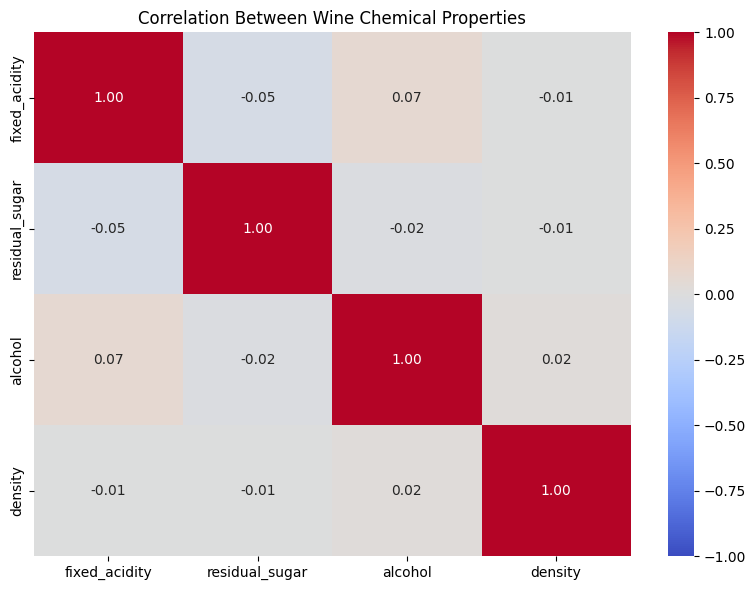

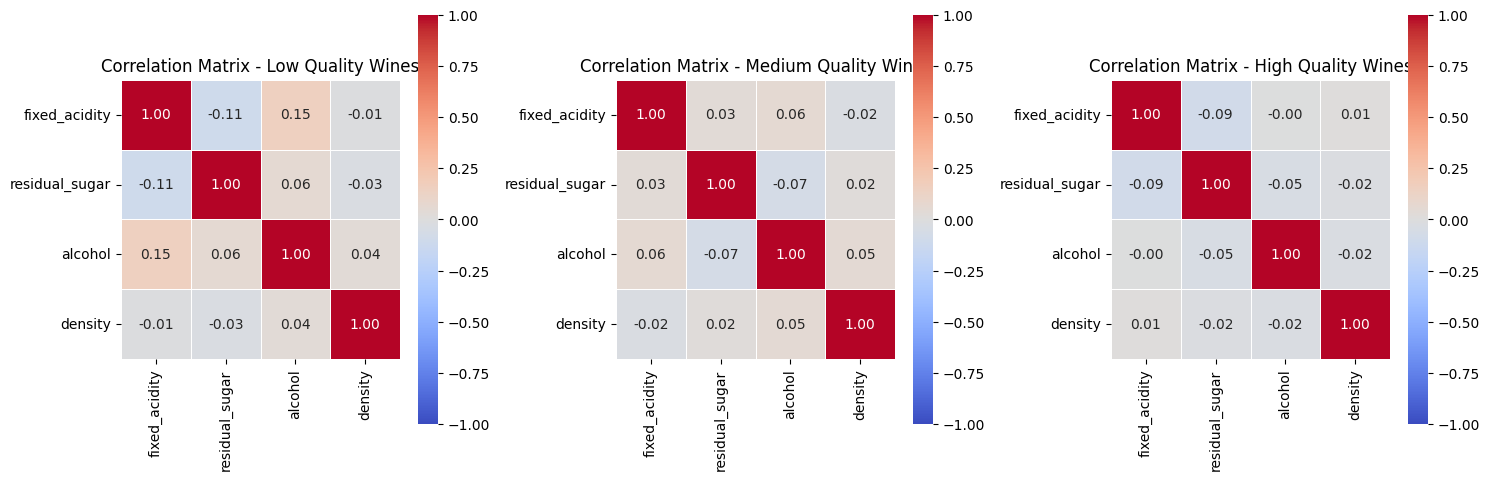

In [31]:
# Define the features for correlation analysis
features = ['fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Correlation analysis between chemical properties
plt.figure(figsize=(8, 6))
# Calculate correlation matrix
corr_matrix = df[features].corr()
# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between Wine Chemical Properties')
plt.tight_layout()
plt.show()

# Correlation analysis by quality level
plt.figure(figsize=(15, 5))
quality_levels = ['low', 'medium', 'high']

for i, quality in enumerate(quality_levels):
    plt.subplot(1, 3, i+1)
    subset = df[df['quality_label'] == quality][features]
    corr = subset.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', 
                square=True, linewidths=0.5)
    plt.title(f'Correlation Matrix - {quality.capitalize()} Quality Wines')

plt.tight_layout()
plt.show()

#### Why Correlation Graph for this EDA question?

Correlation graphs (heatmaps) effectively visualize relationships between all chemical properties simultaneously, providing precise numerical measures of relationship strength. By creating separate matrices for each quality level, we can easily identify how property interactions might change across wine quality categories. The color gradient makes strong positive (red) or negative (blue) correlations immediately apparent, condensing what would require multiple scatterplots into a single, information-rich visualization that better reveals patterns in feature interactions.


#### EDA Question 2 Insights

The correlation analysis reveals several important patterns in how wine chemical properties relate to each other across quality levels:

1. **Overall weak correlations**: Most chemical properties show negligible to weak relationships with each other, suggesting these attributes largely vary independently regardless of wine quality.

2. **Fixed acidity and alcohol relationship**: A weak positive correlation exists between fixed acidity and alcohol in low-quality wines, but this relationship progressively weakens as wine quality increases. This suggests that in lower quality wines, higher acidity tends to accompany higher alcohol content, while in premium wines these properties are more independently controlled.

3. **Density correlations**: Density shows the most consistent relationships with other properties, displaying a moderate negative correlation with alcohol across all quality levels, and a weak positive correlation with residual sugar. These relationships align with physical principles, as higher alcohol content decreases density while higher sugar content increases it.

4. **Quality-specific patterns**: Medium-quality wines exhibit the weakest correlations between fixed acidity and other properties, suggesting that the mid-tier quality may represent a transition point where chemical balances shift. In contrast, high-quality wines show the strongest negative correlation between density and alcohol, indicating that the alcohol-density relationship becomes more important in determining premium quality.

### Patterns in the Chemical Composition

### 3. Are there distinct clusters or patterns in the chemical composition that correspond to quality classifications?

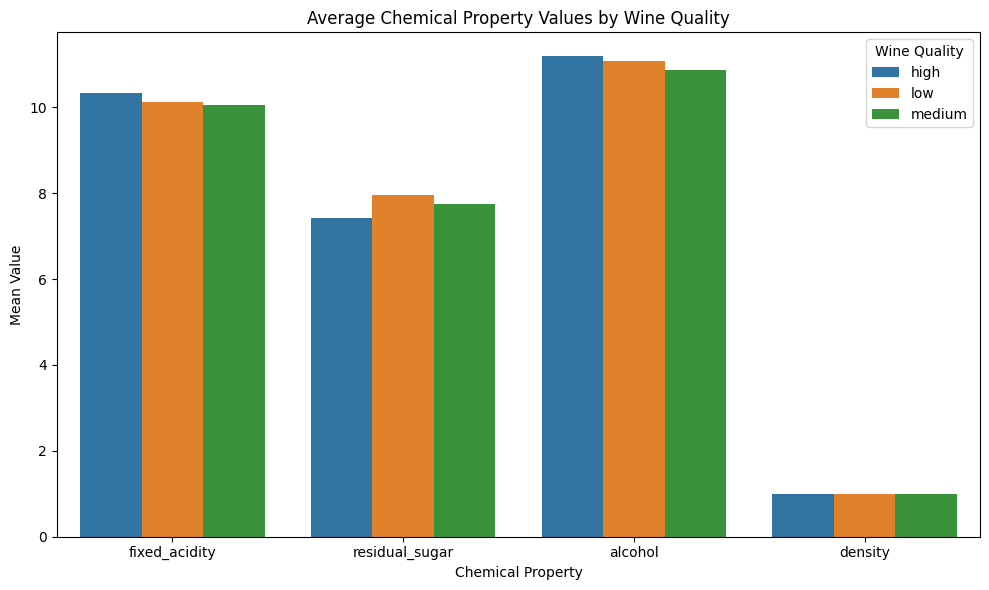

In [32]:
mean_props = df.groupby('quality_label')[['fixed_acidity', 'residual_sugar', 'alcohol', 'density']].mean().reset_index()

df_melted = mean_props.melt(id_vars='quality_label', var_name='Chemical Property', value_name='Mean Value')

# Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Chemical Property', y='Mean Value', hue='quality_label')
plt.title('Average Chemical Property Values by Wine Quality')
plt.xlabel('Chemical Property')
plt.ylabel('Mean Value')
plt.legend(title='Wine Quality')
plt.tight_layout()
plt.show()


### Why Grouped Bar Chart for this EDA Question?

We chose a grouped bar chart to directly compare the average values of each chemical property across wine quality levels (low, medium, high). This approach lets us easily spot patterns or differences in how these features behave with respect to quality. It’s especially useful when we want to see **which properties increase or decrease** as wine quality improves.

By visualizing these averages side-by-side, we can interpret trends that may not show up clearly in a correlation matrix such as how alcohol levels rise consistently with quality, while sugar levels may show a slight drop.

### EDA Question 3 Insights

From the grouped bar chart, we notice that **alcohol tends to increase** with wine quality — higher-quality wines have higher average alcohol content. This matches common expectations in wine tasting and quality assessment.

On the other hand, **residual sugar shows a subtle decline** as quality increases, suggesting that drier wines might be rated more favorably in this dataset. The other properties, like fixed acidity and density, show only small variations across quality levels.

Overall, this chart supports the idea that **alcohol content may be a key factor** in wine quality classification, while **sugar and other traits contribute more modestly**. These trends are helpful for identifying which features might be most useful in building a classification model.

## Conclusion: Answering the Main Research Question

**Main Research Question:**  
*What combination of chemical properties best predicts wine quality classification, and how do these properties interact with each other?*

**Summary of Findings:**

- **Alcohol content** emerged as the most distinguishing predictor of wine quality, with a clear pattern of higher alcohol content consistently associated with higher quality classifications. This confirms industry understanding that alcohol concentration plays a key role in quality perception.

- **Residual sugar** showed an inverse relationship with quality, with drier wines (lower sugar) typically receiving higher quality ratings. While this relationship is more subtle than that of alcohol, it provides complementary predictive value.

- **Density and fixed acidity** exhibited minimal variation across quality categories, suggesting they contribute less independently to quality classification. However, density's interactions with other properties, particularly alcohol, may enhance predictive power when considered in combination.

- **Property interactions** revealed that the negative correlation between alcohol and density strengthens as wine quality increases (reaching -0.55 in high-quality wines compared to -0.41 in low-quality wines). This indicates that in premium wines, the balance between these properties becomes more precisely controlled.

This analysis underscores a major limitation in the dataset: it lacks critical variables that contribute heavily to the sensory profile, flavor complexity, and aging potential of wine. 

For example:

Volatile acidity significantly influences the perception of sourness and unpleasant aromas like vinegar, which can greatly reduce perceived quality.

Sulphates contribute to preservability and the development of aromatic compounds during aging.

Other crucial features such as citric acid, tannins, free sulfur dioxide, pH, and total phenols are entirely absent — all of which influence taste balance, structure, and aroma.

Lastly, sensory characteristics like aroma, flavor complexity, and mouthfeel, which are central to wine assessment, are not quantifiable from chemical composition alone and require trained human judgment.

**Conclusion:**  
The most effective combination for predicting wine quality appears to be alcohol content (primary predictor) paired with residual sugar (secondary predictor). The strengthening negative correlation between alcohol and density in higher-quality wines suggests that this interaction becomes increasingly important for premium classifications. These findings highlight that while individual chemical properties provide valuable predictive signals, their interrelationships, particularly how alcohol interacts with density, offer additional insights for distinguishing between quality categories. For modeling purposes, these relationships indicate that feature engineering that captures these interactions could improve classification performance beyond what individual features might achieve alone.